# Supplemental Figure S5: Reproducibility of DMS measurements below 0.001 across independent experiments.

# Setup

## imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dms_3d_features.plotting import *

## extra functions

In [4]:
def get_dataframe_with_specific_data_values(
    df_construct: pd.DataFrame, df_construct_2, value: float
) -> pd.DataFrame:
    """
    Merges two DataFrames on the 'name' column and filters for rows where both 'data' values are less than 0.001.

    This function takes two DataFrames, each containing 'name' and 'data' columns, and merges them on the 'name' column.
    It then compares the 'data' values from both DataFrames row by row, selecting only the pairs where both values are less
    than 0.001. The result is a new DataFrame with the filtered 'data_1' and 'data_2' columns.

    Args:
        df_construct (pandas.DataFrame): The first DataFrame containing the 'name' and 'data' columns.
        df_construct_2 (pandas.DataFrame): The second DataFrame containing the 'name' and 'data' columns.

    Returns:
        pandas.DataFrame: A new DataFrame with columns 'data_1' and 'data_2', where
            each row contains a pair of corresponding data values from the input DataFrames.

    Raises:
        None
    """
    df_2_sub = df_construct_2[["name", "data"]].copy()
    df_2_sub.rename(columns={"data": "data_2"}, inplace=True)
    df_merge = df_construct.merge(df_2_sub, on="name").copy()
    data = []
    for i, row in df_merge.iterrows():
        for d1, d2 in zip(row["data"], row["data_2"]):
            if d1 < value and d2 < value:
                data.append({"data_1": d1, "data_2": d2})
    df_data = pd.DataFrame(data)
    return df_data

## load data

In [5]:
DATA_PATH = "../../data"
REVISION_PATH = "../../data/revisions"

In [6]:
df_construct = pd.read_json(f"{DATA_PATH}/raw-jsons/constructs/pdb_library_1.json")
df_construct_2 = pd.read_json(f"{DATA_PATH}/raw-jsons/constructs/pdb_library_2.json")

# Plotting

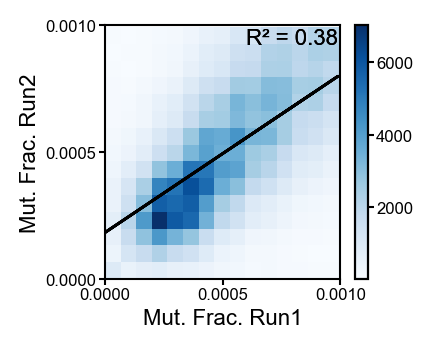

In [7]:
fig, ax = plt.subplots(figsize=(1.90, 1.65), dpi=200)
df_data = get_dataframe_with_specific_data_values(df_construct, df_construct_2, 0.001)
heatmap_scatter_plot_w_regression(df_data, ax, "data_1", "data_2", bins=15)
ax.set_xlabel("Mut. Frac. Run1", labelpad=2)
ax.set_ylabel("Mut. Frac. Run2", labelpad=2)
ax.set_xlim([0, 0.001])
ax.set_ylim([0, 0.001])
ax.set_xticks([0, 0.0005, 0.001])
ax.set_yticks([0, 0.0005, 0.001])
plot_regression_line(df_data, ax, "data_1", "data_2")
publication_style_ax(ax)
fig.savefig(
    "../../figures/supplemental_figures/supplemental_figure_s5.png",
    dpi=600,
    bbox_inches="tight",
)